<hr>
<h2>Gather data, determine the method of data collection and provenance of the data</h2><p>In the earliest phase, select a data source and problem. Feel free to share and discuss your idea on the class discussion board.</p>

<p>For this project, I will be using data from Kaggle, which can be found at the link below</p>
<blockquote><a href='https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009'>https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009</a></blockquote>
<p>Data provenance:</p>
<p>The data from Kaggle comes from the University of California, Irvine Machine Learning Repository, who got the data from the paper "Modeling wine preferences by data mining from physicochemical properties", which can be found at the link below</p>
<blockquote><a href="https://repositorium.sdum.uminho.pt/bitstream/1822/10029/1/wine5.pdf">https://repositorium.sdum.uminho.pt/bitstream/1822/10029/1/wine5.pdf</a></blockquote>
<p>Data:</p>
<p>To summarize, the data describes a multitude of red wine sample's chemical properties, all of the variety of portuguese "Vinho Verde", which comes from the northwest region of Portugal, a wine producing are since the 1600's. In addition to the chemical composition, an additional data point is assigned to each wine sample, called quality. It is on a scale of 0-10, is stated in the research paper as being the median of multiple evaluates of that wine sampe. A full desciption of the data and it's source can be found in the research paper's Section 2.1.</p>
<p>Method of data collection:</p>
<p>As described in section 2.1 of the paper, the data was collected from a an offical wine certification entity called the Vinho Verde Viticulture Commision, or CVRVV. The CVRVV is an inter-professional body of farm and trade professionals and representitives from the vinho verde wine agricultural commodity chain, and has existed since its inception in 1926. The data was provided to the original researchers devoid of any unique identifiers that could link a sample to its unique year, vinyard, grape species, or other nationally protected clasifier. For more informnation on the region, see the link below.</p>
<blockquote><a href="https://www.vinhoverde.pt/">https://www.vinhoverde.pt/</a></blockquote><br>
<p>Citation:</p><p>Cortez, P. et al. <a href="https://repositorium.sdum.uminho.pt/bitstream/1822/10029/1/wine5.pdf">“Modeling wine preferences by data mining from physicochemical properties.”</a> Decis. Support Syst. 47 (2009): 547-553.</p>

<hr><h2>Identify an Unsupervised Learning Problem</h2><p>Model building and training may depend on their data type(s) and task type(s). When using multiple models, at least one of them should be an unsupervised approach. 

If you're going to use a Kaggle competition or similar, you must focus more on model building and/or analysis to be a valid project. Replicating what's in the Kaggle kernel or other notebooks available online is not a valid project. It is reasonable to add different approaches and compare them with the Kaggle kernel or other notebooks available online. It is also good to find a research paper, implement an algorithm, and run experiments comparing its performance to different algorithms.  </p>

<p>Using the wine data collected, I will investigate the following question:</p><ul><li>Is it possible, using unsupervised learning methods, to determine a wine sample's given quality value based solely on its chemical properties? i.e. is sample quality an indicator of a specific collection of chemical properties in the wine itself or is sample quality a more subjective value</li><li>If so, to what degree of accuracy can a samples quality be predicted, and if not, what is/could be hindering the models ability to make accurate predictions</li></ul>

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import scikit-learn as sklearn
from time import time
from itertools import permutations, combinations_with_replacement
from sklearn.model_selection import ParameterGrid

from sklearn.exceptions import ConvergenceWarning
from sklearn.utils._testing import ignore_warnings
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import NMF

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#wine_data = pd.read_csv('winequality-red.csv')
wine_data = pd.read_csv('winequality-white.csv', sep=';')

<h2>Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data</h2><p> Go through the initial data cleaning and EDA and judge whether you need to collect more or different data. 

EDA Procedure Example:

    Describe the factors or components that make up the dataset (The "factors" here are called "features" in the machine learning term. These factors are often columns in the tabulated data). For each factor, use a box-plot, scatter plot, histogram, etc., to describe the data distribution as appropriate.

    Describe correlations between different factors of the dataset and justify your assumption that they are correlated or not correlated. You may use numeric or qualitative/graphical analysis for this step.

    Determine if any data needs to be transformed. For example, if you're planning on using an SVM method for prediction, you may need to normalize or scale the data if there is a considerable difference in the range of the data.

    Using your hypothesis, indicate if it's likely that you should transform data, such as using a log transform or other transformation of the dataset.

    You should determine if your data has outliers or needs to be cleaned in any way. Are there missing data values for specific factors? How will you handle the data cleaning? Will you discard, interpolate or otherwise substitute data values?

    If you believe that specific factors will be more important than others in your analysis, you should mention which and why. You will use this to confirm your intuitions in your final write-up.</p>

<hr><blockquote> Describe the factors or components that make up the dataset (The "factors" here are called "features" in the machine learning term. These factors are often columns in the tabulated data). For each factor, use a box-plot, scatter plot, histogram, etc., to describe the data distribution as appropriate.</blockquote><hr>

<p>In the dataset chosen, there are a total of 12 factors. they are:</p><ul><li>fixed acidity</li><li>volitile acidity</li><li>citric acid</li><li>residual sugar</li><li>chlorides</li><li>free sulfur dioxides</li><li>total sulfur dioxide</li><li>density</li><li>pH</li><li>sulphates</li><li>alcohol</li><li>quality</li></ul><p>Below is a print out of the first 5 rows of the data and a assesment of data types and non-null counts for each feature</p>

In [11]:
def check_counts(y_in, _name):
    print(f"{_name}:")
    for i in range(3, 10):
        #_counts_arr[i-3] = len(y_train[y_train == i])
        print(f'row {i-3}, quality == {i} count: {len(y_in[y_in == i])}')
    print()

In [406]:
def plt_all_feature_hist(data_in):
    fig, ax = plt.subplots(3, 4, figsize=(15,8))
    _df_cols = data_in.columns
    for i in range(len(_df_cols)):
        col = i%4
        row = i//4
        _data = data_in[_df_cols[i]]
        _mean = np.round(np.mean(_data),3)
        _var = np.round(np.var(_data),3)
        _std = np.round(np.std(_data),3)
        
        ax[row][col].hist(_data, bins=50)
        ax[row][col].axvline(_mean, color='c', linestyle='dashed', linewidth=1)
        ax[row][col].axvline(_mean + _std, color='r', linestyle='dashed', linewidth=1)
        ax[row][col].axvline(_mean - _std, color='r', linestyle='dashed', linewidth=1)
        ax[row][col].set_title(_df_cols[i])
        ax[row][col].text(0.82, 0.75, f'mean: {_mean}\nvar: {_var}\nstd: {_std}', horizontalalignment='center', verticalalignment='center', transform=ax[row][col].transAxes)
    plt.tight_layout(w_pad=0)
    #plt.subplots_adjust(right=5)
    plt.show()
    #plt.savefig('white_wine_features_hist')

In [34]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [35]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


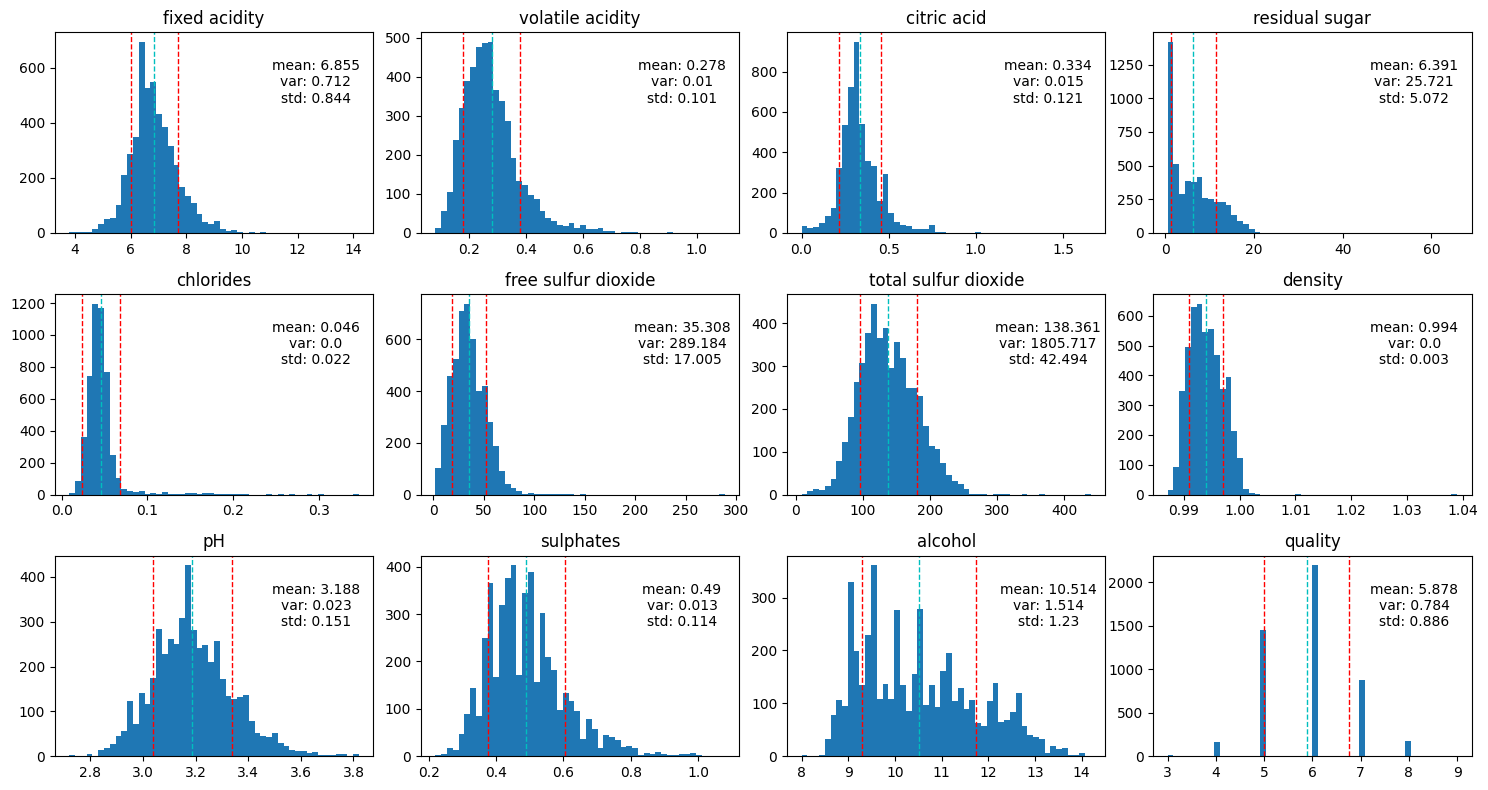

In [407]:
plt_all_feature_hist(wine_data)

<p>note:</p><p>Cyan dashed lines: mean of distribution<br>Red dashed lines: mean +/- 1 std. dev.</p><p>From these histograms, we can see that there are many instances of outliers for each feature.</p><p>Looking at the 'quality' feature in particular, we can se that there are many more counts of quality's of '5' and '6' than all the other counts combigned. We are going to use this fact to inform us on the numnber of bins/categories to use with each unsupervised learning models.</p>

In [18]:
check_counts(wine_data['quality'], 'all_data')

all_data:
row 0, quality == 3 count: 20
row 1, quality == 4 count: 163
row 2, quality == 5 count: 1457
row 3, quality == 6 count: 2198
row 4, quality == 7 count: 880
row 5, quality == 8 count: 175
row 6, quality == 9 count: 5



In [36]:
wine_data_to_use = wine_data.copy()[(wine_data['quality'] != 3) & (wine_data['quality'] != 9)]

In [37]:
check_counts(wine_data_to_use['quality'], 'all_data')

all_data:
row 0, quality == 3 count: 0
row 1, quality == 4 count: 163
row 2, quality == 5 count: 1457
row 3, quality == 6 count: 2198
row 4, quality == 7 count: 880
row 5, quality == 8 count: 175
row 6, quality == 9 count: 0



In [38]:
wine_data_to_use.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4873 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4873 non-null   float64
 1   volatile acidity      4873 non-null   float64
 2   citric acid           4873 non-null   float64
 3   residual sugar        4873 non-null   float64
 4   chlorides             4873 non-null   float64
 5   free sulfur dioxide   4873 non-null   float64
 6   total sulfur dioxide  4873 non-null   float64
 7   density               4873 non-null   float64
 8   pH                    4873 non-null   float64
 9   sulphates             4873 non-null   float64
 10  alcohol               4873 non-null   float64
 11  quality               4873 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 494.9 KB


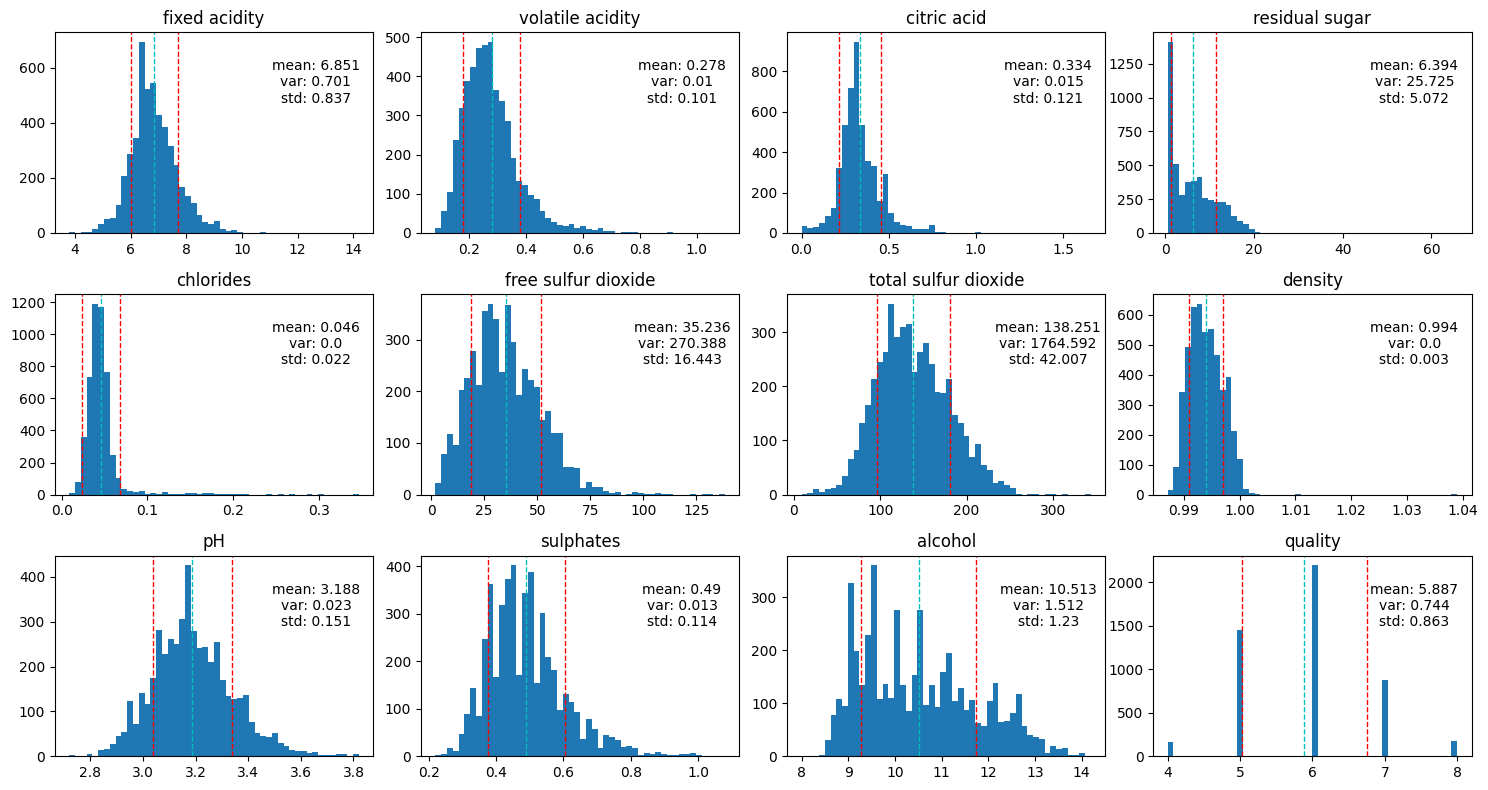

In [39]:
plt_all_feature_hist(wine_data_to_use)

<hr><p>From the above displays, we can saee that there are each data point is either an integer or a decimal, there are no missing data points, and every feature has a consitant data type. We can say now that there is no need for data cleaning: everything is ready to go.</p><p>Given the nature of the data (floating point integers and straight integers), histograms will be effective at showing the distributions of each feature</p>

<hr><p>Data cleaning and investigation of outliers in data</p><blockquote>Are there missing data values for specific factors? How will you handle the data cleaning? Will you discard, interpolate or otherwise substitute data values?</blockquote><p>Right away, we can see that there is no need for data cleaning, as explained earlier.</p><p>To inspect the data for outliers, we can plot each feature as a histogram and look at the tails for each distribution.</p>

<hr><blockquote>Describe correlations between different factors of the dataset and justify your assumption that they are correlated or not correlated. You may use numeric or qualitative/graphical analysis for this step.</blockquote><hr><p>To assess correlations between features in this data set, we're going to use a correlation matrix, generaetd using pandas' .corr() function and plotted using seaborn's heatmap()</p><hr>

In [411]:
def plot_corr(corr_in, format=None, use_mask=True, diverging=True, color='seagreen', 
              x_ticks_in=None, y_ticks_in=None, 
              x_label=None, y_label=None,
              x_rotation=None, y_rotation=None):
    
    f, ax = plt.subplots(figsize=(9, 6))
    
    mask = np.triu(np.ones_like(corr_in, dtype=bool))
    if diverging:
        cmap = sns.diverging_palette(230, 20, as_cmap=True)
    else:
        cmap = sns.light_palette(color, as_cmap=True)
    
    if use_mask:
        params = {'data': corr_in, 'annot': True, 'cmap': cmap, 'mask': mask, 'linewidth': 0.5, 'ax': ax}
    else:
        params = {'data': corr_in, 'annot': True, 'cmap': cmap, 'linewidth': 0.5, 'ax': ax}
    if format is not None:
        params['fmt'] = format
        
    sns.heatmap(**params)
    if x_label is not None and y_label is not None:
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        
    if x_ticks_in is not None:
        ax.set_xticklabels(x_ticks_in)

    if y_ticks_in is not None:
        ax.set_yticklabels(y_ticks_in)

    if x_rotation is not None:
        plt.xticks(rotation=x_rotation) 
    else:
        plt.xticks(rotation=66) 

    if y_rotation is not None:
        plt.yticks(rotation=y_rotation) 
    plt.tight_layout()
    #plt.savefig('white_wine_muli_co_var')
    #plt.show()

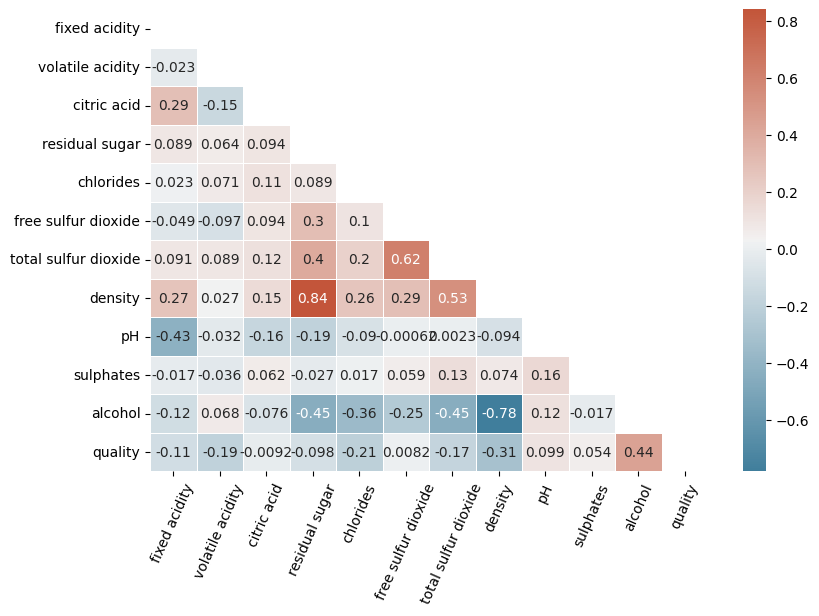

In [7]:
wine_corr = wine_data.corr()
plot_corr(wine_corr)

In [8]:
def compute_vif(df, considered_feature=None):
    
    X = df
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [409]:
compute_vif(wine_data).sort_values('VIF', ascending=False)

,Variable,VIF
7,density,28.591234
3,residual sugar,12.947302
10,alcohol,7.807600
0,fixed acidity,2.696863
6,total sulfur dioxide,2.239495
8,pH,2.215431
5,free sulfur dioxide,1.795035
11,quality,1.392506
4,chlorides,1.236874
1,volatile acidity,1.203769


In [9]:
compute_vif(wine_data.copy().drop(columns=['density', ])).sort_values('VIF', ascending=False)

,Variable,VIF
6,total sulfur dioxide,2.155565
9,alcohol,1.996363
5,free sulfur dioxide,1.756151
3,residual sugar,1.464873
10,quality,1.375037
0,fixed acidity,1.359289
7,pH,1.332002
4,chlorides,1.204405
1,volatile acidity,1.196604
2,citric acid,1.159905


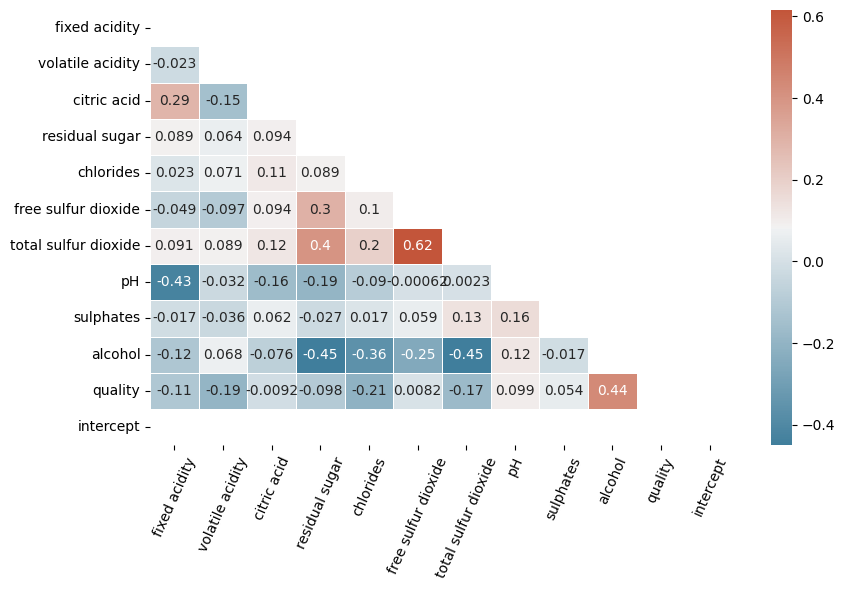

In [412]:
wine_data_to_use = wine_data.copy().drop(columns=['density'])
plot_corr(wine_data_to_use.corr())

<hr><p>In the above map, more transparent cells represent little correlation between features, solid cells represent strong correlation, and red and blue colors represent positive and negative correlations, respectively.</p><p>You can see that there are not many strong correlations one way or the other. Some strong correlations exist between:</p><ul><li>(fixed acidity, pH)</li><li>(fixed acity, density)</li><li>(free sulfur diozide, total sulfur dioxide)</li><li>(citric acid, fixed acidity)</li><li>(citric acid, volatile acidity)</li><li>(density, alcohol)</li><li>(quality, alcohol)</li></ul><hr>

<hr><blockquote>Determine if any data needs to be transformed. For example, if you're planning on using an SVM method for prediction, you may need to normalize or scale the data if there is a considerable difference in the range of the data.</blockquote><hr>

<p>As stated previously, we are going to look at models and results from K-means, Non-zero Matrix Factorization, </p>

In [40]:
np.round(wine_data_to_use.describe(),3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4873.000,4873.000,4873.000,4873.000,4873.000,4873.000,4873.000,4873.000,4873.000,4873.000,4873.000,4873.000
mean,6.851,0.278,0.334,6.394,0.046,35.236,138.251,0.994,3.188,0.490,10.513,5.887
std,0.837,0.101,0.121,5.073,0.022,16.445,42.011,0.003,0.151,0.114,1.230,0.863
min,3.800,0.080,0.000,0.600,0.009,2.000,9.000,0.987,2.720,0.220,8.000,4.000
25%,6.300,0.210,0.270,1.700,0.036,23.000,108.000,0.992,3.090,0.410,9.500,5.000
50%,6.800,0.260,0.320,5.200,0.043,34.000,134.000,0.994,3.180,0.470,10.400,6.000
75%,7.300,0.320,0.390,9.900,0.050,46.000,167.000,0.996,3.280,0.550,11.400,6.000
max,14.200,1.100,1.660,65.800,0.346,138.500,344.000,1.039,3.820,1.080,14.200,8.000


<hr><blockquote>Using your hypothesis, indicate if it's likely that you should transform data, such as using a log transform or other transformation of the dataset.</blockquote><hr>

<hr><blockquote>If you believe that specific factors will be more important than others in your analysis, you should mention which and why. You will use this to confirm your intuitions in your final write-up.</blockquote><hr>

<h2>Perform Analysis Using Unsupervised Learning Models of your Choice, Present Discussion, and Conclusions</h2><p>Model building and training may depend on their data type(s) and task type(s). Depending on your project, you may have one model or more. Generally, it is deemed a higher quality project if you compare multiple models and show your understanding of why specific models work better than the other or what limitations or cautions specific models may have. <b>When using multiple models, at least one of them should be an unsupervised approach</b>. 

 For machine learning models, another recommendation is to show enough effort on the hyperparameter optimization.

 If your project involves making a web app (not required), you can include the demo.</p>

<h3>Building and training of unsupervised learning models</h3>

<h4>Generating, train, validation, and testing data</h4>

In [41]:

def get_vals(wine_data_in, final_test_perc=0.25, train_val_perc=0.33, rand_state=0):
    
    df_copy = wine_data_in.copy()
    true_quality = df_copy['quality']
    sample_data = df_copy.drop(columns=['quality'])
    
    X_all_train, X_test, y_all_train, y_test = train_test_split(sample_data, true_quality, 
                                                                test_size=final_test_perc, random_state=rand_state)
    full_data_split = [X_test, y_test]
    
    train_validate_split = train_test_split(X_all_train, y_all_train, 
                                       test_size=train_val_perc, random_state=rand_state)
    
    return [full_data_split, train_validate_split]
    

In [45]:
[[X_test, y_test], train_validate] = get_vals(wine_data_to_use, rand_state=4)
[X_train, X_validate, y_train, y_validate] = train_validate

In [99]:
check_counts(wine_data_to_use['quality'], 'all')
check_counts(y_train, 'y_train')
check_counts(y_validate, 'y_validate')
check_counts(y_test, 'y_test')

all:
row 0, quality == 3 count: 0
row 1, quality == 4 count: 163
row 2, quality == 5 count: 1457
row 3, quality == 6 count: 2198
row 4, quality == 7 count: 880
row 5, quality == 8 count: 175
row 6, quality == 9 count: 0

y_train:
row 0, quality == 3 count: 0
row 1, quality == 4 count: 75
row 2, quality == 5 count: 719
row 3, quality == 6 count: 1126
row 4, quality == 7 count: 441
row 5, quality == 8 count: 87
row 6, quality == 9 count: 0

y_validate:
row 0, quality == 3 count: 0
row 1, quality == 4 count: 48
row 2, quality == 5 count: 374
row 3, quality == 6 count: 511
row 4, quality == 7 count: 230
row 5, quality == 8 count: 43
row 6, quality == 9 count: 0

y_test:
row 0, quality == 3 count: 0
row 1, quality == 4 count: 40
row 2, quality == 5 count: 364
row 3, quality == 6 count: 561
row 4, quality == 7 count: 209
row 5, quality == 8 count: 45
row 6, quality == 9 count: 0



In [48]:
print(X_train.shape)
print(X_test.shape)
print(X_test.shape)
print(X_test.shape[0] + X_test.shape[0])
print(X_validate.shape[0]/(X_test.shape[0]))
print(X_train.shape[0]/(X_test.shape[0]))
print(X_validate.shape[0]/(X_test.shape[0] + y_test.shape[0]))
print(X_train.shape[0]/(X_test.shape[0] + y_test.shape[0]))
print(y_train.head())

(2448, 11)
(1219, 11)
(1219, 11)
2438
0.9893355209187858
2.0082034454470876
0.4946677604593929
1.0041017227235438
540     4
4233    6
3774    5
2746    6
1970    6
Name: quality, dtype: int64


<hr><h3>Model selection</h3>
<p>To try and find an interesting set of models, only the models that meet the following critera will be considered 'optimal':
<ol><li>achieved the highest accuracy score</li><li>had correctly predicted at least one sample's 'quality' for each value of 'quality' (i.e. every category had at least one count)</li></ol>
This way, a models overall accuracy score would not exclusively determine what was a good model and the testing would not return models that predicted almost every label to fall into the largest possible category.</p>

<h4>Model set 1: K-means</h4><p>Here we train and rank K-means models, selecting only models that meet the critera above.</p>

In [49]:
def create_kmeans(X_train_in, n_clusters_in):
    algorithms = ['lloyd', 'elkan']
    inits = ['k-means++', 'random']
    all_kmeans = []
    for i in range(len(algorithms)):
        for j in range(len(inits)):
            #print('i:', i, 'j:', j, '\nalgorithms[i]:', algorithms[i], 'inits[j]:', inits[j], '\n')
            #start_time = time.time()
            
            kmeans = KMeans(n_clusters=n_clusters_in, 
                            random_state=0, 
                            algorithm=algorithms[i],
                            init=inits[j]).fit(X_train_in)
            
            #exec_time = time.time() - start_time
            
            all_kmeans.append([algorithms[i], inits[j], kmeans])#, exec_time])

    return all_kmeans


In [73]:
def convert_labels(labels_in, container, _map):
    for i in range(len(labels_in)):
        container[i] = _map[labels_in[i]]
    return container
    

In [74]:
def generate_combinations(my_list_in, _n_comp_in, show_prints=False):
    my_list = my_list_in #[0,1,2,3]
    
    my_rep_list = list(combinations_with_replacement(my_list, _n_comp_in))
    #my_rep_list = [my_rep_list[i] for i in range(len(my_rep_list)) if sum(my_rep_list[i]) == 6]
    #print(list(combinations_with_replacement([0], 2)))
    my_rep_list = [[l, list(np.unique(l))] for l in my_rep_list]
    #my_rep_list_test = [list(np.unique(l)) for l in my_rep_list]
    t_list_2 = []
    for list_i in my_rep_list:
        if list_i[1] == my_list:
            t_list_2.append(list_i[0])
    #display(my_rep_list)
    if show_prints:
        display(t_list_2)

    final_list = []
    for list_i in t_list_2:
        final_list = final_list + list(permutations(list_i))
    #display(final_list)
    final_list = sorted(list(set(final_list)))
    if show_prints:
        display(final_list)
    return final_list
#generate_combinations([0,1], 7, show_prints=True)

In [270]:
test_arr_true = np.array([1,1,0,0,0])
test_arr_pred = np.array([1,1,0,1,1])
display(test_arr_true)
test_arr_2 = test_arr_true == 0
print(test_arr_2)
print(sum(test_arr_2))
display(test_arr_true[test_arr_2])
display(test_arr_pred[test_arr_2])
print(test_arr_true[test_arr_2]==test_arr_pred[test_arr_2])
print(accuracy_score(test_arr_true[test_arr_2], test_arr_pred[test_arr_2]))
acc_arr_test = np.array([.1,.1,.1,.1,.09])
print(acc_arr_test)
g_t = [i >= 0.1 for i in acc_arr_test]
print(g_t)
print(sum(g_t))


array([1, 1, 0, 0, 0])

[False False  True  True  True]
3


array([0, 0, 0])

array([0, 1, 1])

[ True False False]
0.3333333333333333
[0.1  0.1  0.1  0.1  0.09]
[True, True, True, True, False]
4


In [374]:

def label_permute_compare(y_true, y_pred, n, all_perm_in, showPrints):
    if showPrints:
        print('label_permute_compare start\n')
    y_true_vals = y_true.values
    
    if showPrints:
        display(all_perm_in[:5])
    
    all_map_perm = [ {'map':{i+4:perm[i] for i in range(5)}, 'perm':perm} for perm in all_perm_in]
    
    #display(all_perm)
    score_col = []
    y_true_convert = np.zeros(len(y_true_vals))
    #print(y_true_vals.shape)
    #print(y_true_vals[:5])
    for map_perm in all_map_perm:
        #print(map_perm, map_perm['map'])
        _labels = list(set(map_perm['perm']))
        y_true_convert = convert_labels(y_true_vals, y_true_convert, map_perm['map'])
        
        acc_arr = [0 for i in _labels]
        for i in _labels:
            y_trues_are_i = y_true_convert == i
            acc_arr[i] = accuracy_score(y_true_convert[y_trues_are_i], y_pred[y_trues_are_i])
        acc_score_g_t = [i > 0 for i in acc_arr]
        if showPrints:
            print(acc_score_g_t)
        _sum = sum(acc_score_g_t)
        
        if _sum == len(_labels):
            score_col.append([accuracy_score(y_true_convert, y_pred), map_perm['map'], str(map_perm['perm']),])
        
        #score_col.append([accuracy_score(y_true_convert, y_pred), map_perm['map'], str(map_perm['perm']),])
    #display(score_col[:5])   
    
    score_col = np.array(score_col)
    if showPrints:
        print('score_col.shape final:', score_col.shape)
    if len(score_col) > 0:
        score_df = pd.DataFrame({'score': score_col[:,0], 'map': score_col[:,1], 'permutation': score_col[:,2]}).sort_values(by=['score'], ascending=False)
        #print('score_df:\n', score_df.head())
    
        return score_df.iloc[0]
    else:
        return []


In [360]:
def all_clusters_dfs(all_kmeans_in, y_train_in, showPrints = False):
    all_kmeans_final_results = []
    _n = all_kmeans_in[0][2].get_params()['n_clusters']
    all_perm = generate_combinations(list(range(_n)), 5)
    index = 0
    _ind_missed = 1
            
    _len = len(all_kmeans_in)
    for model in all_kmeans_in:
        #print(model)
        mod = model[2]
        
        score_map_perm_best = label_permute_compare(y_train_in, mod.labels_, _n, all_perm, showPrints)
        if showPrints: print('score_map_perm_best:',score_map_perm_best)
       
        #print(df)
        if showPrints: print('mod:', mod)

        if len(score_map_perm_best) == 0:
            index += 1
            _ind_missed += 1
            print(f'% done: {np.round(index/_len*100, 4)}, % no model: {np.round(_ind_missed/_len*100, 4)}, frac: {np.round(_ind_missed/index, 4)}', end='\r')
            continue
        '''
        y_true_vals = y_train_in.values
        y_true_convert = np.zeros(len(y_train_in))
        for i in range(len(y_train_in)):
            y_true_convert[i] = score_map_perm_best['map'][y_true_vals[i]]
        
        conf_matrix = confusion_matrix(y_true_convert, mod.labels_)
        '''
        y_true_convert = np.zeros(len(y_train_in))
        #_map = {val: key for key, val in score_map_perm_best['map'].items()}
        y_true_convert = convert_labels(y_train_in.values, y_true_convert, score_map_perm_best['map'])

        #y_true_df = pd.DataFrame({'y_true_original': y_train_in, 'y_true_convert_to_pred_categories': y_true_convert})
        #display(y_true_df.head())
        #print(y_train_in.values[:5])
        #print(mod.labels_[:5])
        conf_matrix_norm = confusion_matrix(y_true_convert, mod.labels_, normalize='true')
        conf_matrix_count = confusion_matrix(y_true_convert, mod.labels_)
        #print(conf_matrix)
        #all_kmeans_final_results.append([model[0], model[1], model[3], acc, conf_matrix])
        all_kmeans_final_results.append([model[0], model[1], model[2], score_map_perm_best['score'], score_map_perm_best['map'], conf_matrix_norm, conf_matrix_count])
        index += 1
        print(f'% done: {np.round(index/_len*100, 4)}, % no model: {np.round(_ind_missed/_len*100, 4)}, frac: {np.round(_ind_missed/index, 4)}', end='\r')
            
    #display(all_kmeans_final_results)
    #kmeans_df = pd.DataFrame(np.array(all_kmeans_final_results), columns=['Algorithm', 'Init', 'exec_time', 'score', 'conf_matrix']).sort_values(by=['score'], ascending=False)
    kmeans_df_out = pd.DataFrame(all_kmeans_final_results, columns=['Algorithm', 'Init', 'model', 'score', 'map true label to pred label', 'conf_matrix_norm', 'conf_matrix_count']).sort_values(by=['score'], ascending=False)

    return kmeans_df_out


In [423]:
def plot_conf(corr_norm_in, corr_count_in, pure_counts_in, title, format=None, color='seagreen', color_2 = 'red', color_3='maroon',
              x_ticks_in=None, y_ticks_in=None, 
              x_label=None, y_label=None,
              x_rotation=None, y_rotation=None):
    
    f, ax = plt.subplots(1, 3, figsize=(11, 4), gridspec_kw={'width_ratios': [6, 6, 1]})
    
    cmap = sns.light_palette(color, as_cmap=True)
    cmap_2 = sns.light_palette(color_2, as_cmap=True)
    cmap_3 = sns.light_palette(color_3, as_cmap=True)
    
    

    _shared_param = {'annot': True, 'linewidth': 1.0}
    _norm_param = {'data':corr_norm_in, 'ax':ax[0], 'cmap': cmap, **_shared_param}
    if format is not None:
        _norm_param['fmt'] = format
    _count_param = {'data':corr_count_in, 'ax':ax[1], 'cmap': cmap_2, 'fmt': '.0f', **_shared_param}
    _pure_count_param = {'data':pure_counts_in, 'ax':ax[2], 'cmap': cmap_3, 'fmt': '.0f', 'cbar':False, **_shared_param}
    
    #print(_norm_param)
    #print(_count_param)
    #print('ax shape', ax.shape)
    sns.heatmap(**_norm_param)
    sns.heatmap(**_count_param)
    sns.heatmap(**_pure_count_param)
    ax[0].set_title('Normalized over true (row) counts')
    ax[1].set_title('Counts only')
    ax[2].set_title('Row totals')
    
    if x_label is not None and y_label is not None:
        for ax_i in ax[:2]:
            ax_i.set_xlabel(x_label)
            ax_i.set_ylabel(y_label)
        
    if x_ticks_in is not None:
        for ax_i in ax[:2]:
            ax_i.set_xticklabels(x_ticks_in)

    if y_ticks_in is not None:
        for ax_i in ax:
            ax_i.set_yticklabels(y_ticks_in)
    
    if x_rotation is not None:
        for ax_i in ax[:2]:
            ax_i.tick_params('x', labelrotation=x_rotation)
            
    if y_rotation is not None:
        for ax_i in ax[:2]:
            ax_i.tick_params('y',labelrotation=y_rotation)
        ax[2].tick_params('y',labelrotation=y_rotation)
    plt.tight_layout()

    t_file = title.replace("\n", "_").replace(" ", '_').replace(",", '_').replace(".", '_').replace('-', '_').replace('=', '_')
    print(t_file)
    plt.suptitle(title, size=16)
    plt.subplots_adjust(top=0.73)
    plt.savefig(t_file)
    plt.show()

In [381]:
def plot_best_model(kmeans_df_in, y_true_vals_in, title):
    best_scoring = kmeans_df_in.iloc[0]
    #print(best_scoring)
    #print(best_scoring['conf_matrix_count'])

    try:
        _n_comp = best_scoring['model'].get_params()['n_clusters']
        title = title + f"\nn_clusters = {best_scoring['conf_matrix_norm'].shape[0]}"
    except:
        _n_comp = best_scoring['model'].get_params()['n_components']
        title = title + f"\nn_components = {best_scoring['conf_matrix_norm'].shape[0]}"
    #print('_n_comp:', _n_comp)
    
    t_label = [[val, key] for key, val in best_scoring['map true label to pred label'].items()]
    t_label.sort(key=lambda x: x[0])
    t_label = np.array(t_label)
    #print(t_label)
    #print('\nstart\n')
    t_label_f = ["" for i in range(_n_comp)]
    for i in range(_n_comp):
        #print(t_label[:,0])
        #print(t_label[t_label[:, 0] == i])
        _lab = t_label[t_label[:, 0] == i][:, 1]
        t_label_f[i] = _lab
        '''
        if len(_lab) == 1:
            t_label_f[i] = _lab[0]
        else:
            t_label_f[i] = _lab
        '''

    #print('t_label_f:', t_label_f)
    p_label_f = [i for i in range(_n_comp)]
    
    
    #print(t_label_f)
    #print(p_label_f)
    cols = kmeans_df_in.columns
    count = 0
    
    
    _str_final_print = ''
    for i in range(len(best_scoring)):
        if 'conf_matrix' in cols[i] and count == 0:
            #disp = ConfusionMatrixDisplay(confusion_matrix=best_scoring[cols[i]])#, display_labels=_label_order)
            #disp.plot()
            #plt.show()
            count += 1

            #print('conf shape:', best_scoring['conf_matrix_norm'].shape)
            
            if _n_comp == 7:
                _conf_matrix_norm = np.zeros((best_scoring['conf_matrix_norm'].shape))
                _conf_matrix_count = np.zeros((best_scoring['conf_matrix_norm'].shape))
                _counts_arr = np.zeros((best_scoring['conf_matrix_norm'].shape[0], 1))
                _t_lab_new_f = ['' for i in range(_n_comp)]
                for i in range(_n_comp):
                    #print(i,t_label_f[i], t_label_f[i]-3)
                    
                    _conf_matrix_norm[t_label_f[i] - 4] = best_scoring['conf_matrix_norm'][i]
                    _conf_matrix_count[t_label_f[i] - 4] = best_scoring['conf_matrix_count'][i]
                    _t_lab_new_f[i] = i + 4
                y_rot = 90

                for i in range(4, 9):
                    _counts_arr[i-4] = len(y_true_vals_in[y_true_vals_in == i])
                    #print(f'row {i-3}, quality == {i} count: {len(y_true_vals_in[y_true_vals_in == i])}')
            else:
                _conf_matrix_norm = best_scoring['conf_matrix_norm']
                _conf_matrix_count = best_scoring['conf_matrix_count']
                _t_lab_new_f = t_label_f
                y_rot = 0

                #print(t_label_f)
                _counts_arr = np.zeros((best_scoring['conf_matrix_norm'].shape[0], 1))
                for i in range(len(t_label_f)):
                    _s = 0
                    #print(t_label_f[i])
                    for j in t_label_f[i]:
                        try:
                            _s += len(y_true_vals_in[y_true_vals_in == j])
                        except:
                            #print(y_true_vals_in[y_true_vals_in == j])
                            _s += 1
                    _counts_arr[i] = _s
                    #print(f'row {i}, quality == {t_label_f[i]} count: {_s}')
                    #print(f'quality == {i} count:', len(y_true_vals_in[y_true_vals_in == i]))
            title = title + f"\naccuracy score = {np.round(best_scoring['score'], 4)}"
            plot_conf(_conf_matrix_norm, _conf_matrix_count, _counts_arr, title, format=".3f",
                      color='darkgreen',
                      color_2="steelblue",
                      color_3="firebrick",
                      x_ticks_in=p_label_f,
                      y_ticks_in=_t_lab_new_f,
                      x_label='pred labels', y_label='true labels',
                      #x_rotation=0, 
                      y_rotation=y_rot)
        
        elif 'conf_matrix' not in cols[i] and count == 0:    
            _str_final_print = _str_final_print + f"{cols[i]}: {best_scoring[cols[i]]}\n"
            #print(f"{cols[i]}:")
            #display(best_scoring[cols[i]])
            #print('\n')
    print(_str_final_print)

In [85]:
def score_preds(kmeans_df_in, X_train_in, y_train_in):
    kmeans_df_best = {'model':kmeans_df_in.iloc[0]['model'], 'map':kmeans_df_in.iloc[0]['map true label to pred label']}
    y_pred = kmeans_df_best['model'].predict(X_train_in)
    y_t_conv = np.zeros(len(y_train_in))
    #print(X_train_in.shape)
    #print(y_train_in.shape)
    y_t_conv = convert_labels(y_train_in.values, y_t_conv, kmeans_df_best['map'])
    conf_matrix_norm = confusion_matrix(y_t_conv, y_pred, normalize='true')
    conf_matrix_count = confusion_matrix(y_t_conv, y_pred)
    acc_score = accuracy_score(y_t_conv, y_pred)
    
    _cols = ['model', 'score', 'conf_matrix_norm', 'conf_matrix_count', 'map true label to pred label']
    _data = [[kmeans_df_best['model'], acc_score, conf_matrix_norm, conf_matrix_count, kmeans_df_best['map']]]
    #display(_data)
    return pd.DataFrame(data=_data, columns=_cols)

In [ ]:
all_kmeans = create_kmeans(X_train, 5)
kmeans_df = all_clusters_dfs(all_kmeans, y_train)
train_kmeans_df = score_preds(kmeans_df, X_train, y_train)
validate_kmeans_df = score_preds(kmeans_df, X_validate, y_validate)
test_kmeans_df = score_preds(kmeans_df, X_test, y_test)

In [107]:
all_kmeans_n3 = create_kmeans(X_train, 3)

In [361]:
kmeans_df_n3 = all_clusters_dfs(all_kmeans_n3, y_train)

In [362]:
train_kmeans_df_n3 = score_preds(kmeans_df_n3, X_train, y_train)

In [363]:
validate_kmeans_df_n3 = score_preds(kmeans_df_n3, X_validate, y_validate)

In [364]:
test_kmeans_df_n3 = score_preds(kmeans_df_n3, X_test, y_test)

In [112]:
all_kmeans_n2 = create_kmeans(X_train, 2)

In [365]:
kmeans_df_n2 = all_clusters_dfs(all_kmeans_n2, y_train)

In [366]:
train_kmeans_df_n2 = score_preds(kmeans_df_n2, X_train, y_train)

In [367]:
validate_kmeans_df_n2 = score_preds(kmeans_df_n2, X_validate, y_validate)

In [368]:
test_kmeans_df_n2 = score_preds(kmeans_df_n2, X_test, y_test)

<h4>Model set 2: Aglomerative Clustering</h4><p>Here we train and rank Agglomerative Clustering models, selecting only models that meet the critera above.</p>

In [116]:
def generate_AggloClusters(to_fit, n_clusters):
    link_methods = ['ward', 'complete', 'average', 'single']
    dist_metrics = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
    models = []
    for i in range(len(link_methods)):
        for j in range(len(dist_metrics)):
            #print('i:', i, 'j:', j, '\nlink_methods[i]:', link_methods[i], 'dist_metrics[j]:', dist_metrics[j], '\n')
            if link_methods[i] == 'ward':
                
                mod = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', metric='euclidean').fit(to_fit)
    
                models.append([ 'ward', 'euclidean', mod])
                break
            
            else:
                
                mod = AgglomerativeClustering(n_clusters=n_clusters, linkage=link_methods[i], metric=dist_metrics[j]).fit(to_fit)
    
                models.append([link_methods[i], dist_metrics[j], mod])

    return models

In [356]:
def all_agglo_dfs(all_agglo_in, y_train_in, showPrints = False):
    all_agglo_final_results = []
    _n = all_agglo_in[0][2].get_params()['n_clusters']
    all_perm = generate_combinations(list(range(_n)), 5)
    index = 0
    _ind_missed = 0
    _len = len(all_agglo_in)
    
    for model in all_agglo_in:
        #print(model)
        mod = model[2]
        
        #f_df = helper_agglo(y_train_in, mod.labels_, showPrints)
        #if showPrints: print('mod:', mod)
        #print(mod.get_params()['n_clusters'])
        #if showPrints: print(f_df.head())
        #labelorder, acc = label_permute_compare_agglo(y_train_in, mod.labels_, f_df, mod.get_params()['n_clusters'], showPrints)
        
        score_map_perm_best = label_permute_compare(y_train_in, mod.labels_, _n, all_perm, showPrints)
        if showPrints: print('score_map_perm_best:',score_map_perm_best)

        if len(score_map_perm_best) == 0:
            index += 1
            _ind_missed += 1
            print(f'% done: {np.round(index/_len*100, 4)}, % no model: {np.round(_ind_missed/_len*100, 4)}, frac: {np.round(_ind_missed/index, 4)}', end='\r')
            continue
            
        y_true_convert = np.zeros(len(y_train_in))
        #_map = {val: key for key, val in score_map_perm_best['map'].items()}
        y_true_convert = convert_labels(y_train_in.values, y_true_convert, score_map_perm_best['map'])

        #y_true_df = pd.DataFrame({'y_true_original': y_train_in, 'y_true_convert_to_pred_categories': y_true_convert})
        #display(y_true_df.head())
        #print(y_train_in.values[:5])
        #print(mod.labels_[:5])
        conf_matrix = confusion_matrix(y_true_convert, mod.labels_, normalize='true')
        
        all_agglo_final_results.append([model[0], model[1], score_map_perm_best['score'], score_map_perm_best['map'], conf_matrix])
        index += 1
        print(f'% done: {np.round(index/_len*100, 4)}, % no model: {np.round(_ind_missed/_len*100, 4)}, frac: {np.round(_ind_missed/index, 4)}', end='\r')
            
    #display(all_agglo_final_results)
    agglo_df_out = pd.DataFrame(all_agglo_final_results, columns=['Algorithm', 'Init', 'score', 'labelorder', 'conf_matrix']).sort_values(by=['score'], ascending=False)

    return agglo_df_out

In [375]:
aggloCluster_models = generate_AggloClusters(to_fit=X_train, n_clusters=5)
final_results_agglo = all_clusters_dfs(aggloCluster_models, y_train, showPrints=False)

In [376]:
aggloCluster_models_n3 = generate_AggloClusters(to_fit=X_train, n_clusters=3)
final_results_agglo_n3 = all_clusters_dfs(aggloCluster_models_n3, y_train, showPrints=False)

In [377]:
aggloCluster_models_n2 = generate_AggloClusters(to_fit=X_train, n_clusters=2)
final_results_agglo_n2 = all_clusters_dfs(aggloCluster_models_n2, y_train, showPrints=False)

<h4>Model set 3: Non-zero Matrix Factorization (NMF)</h4><p>Here we train and rank NMF models, selecting only models that meet the critera defined earlier.</p>

In [139]:
def score_predictions(input_W, true_vals_arr, in_category_dict):
    
    pred_vals = np.array([np.argmax(row) for row in input_W])
    showPrints=False
    
    if showPrints: 
        print('pred_vals:', pred_vals[:10])
        print('pred_vals > 4:', pred_vals[pred_vals > 4])
        print('pred_vals len:', len(pred_vals))
        print('input_array len:', len(input_array))
        print('input_array len:', len(input_array))
        print('in_category_dict:', in_category_dict)
        
    pred_val_categories = [in_category_dict[ind] for ind in pred_vals]
    
    _score = np.mean(pred_val_categories == true_vals_arr)

    return _score

def calc_preds(nmf_in, category_map_in, X_train_in, X_validate_in, y_train_in, y_validate_in):
    '''
    nmf_W_train = nmf.transform(tfidf_train)

    tfidf_validate = tfidf_vectorizer_train.transform(X_validate)
    nmf_W_validate = nmf.transform(tfidf_validate)
    
    _score_train = score_predictions(nmf_W_train, y_train, category_dict)
    _score_validate = score_predictions(nmf_W_validate, y_validate, category_dict)
    '''

    nmf_W_train = nmf_in.transform(X_train_in)
    #print(nmf_W_train[:5])
    nmf_W_validate = nmf_in.transform(X_validate_in)
    
    _score_train = score_predictions(nmf_W_train, y_train_in, category_map_in)
    _score_validate = score_predictions(nmf_W_validate, y_validate_in, category_map_in)

    return [_score_train, _score_validate]

def display_preds(nmf_in, category_map_in, X_train_in, X_validate_in, y_train_in, y_validate_in):

    scores = calc_preds(nmf_in, category_map_in, X_train_in, X_validate_in, y_train_in, y_validate_in)
    
    print(f'Training accuracy score: {scores[0]}')
    print(f'Validate accuracy score: {scores[1]}')

In [331]:
@ignore_warnings(category=ConvergenceWarning)
def all_nmf_dfs(all_nmf_in, X_train_in, y_train_in, showPrints = False):
    all_nmf_final_results = []
    index = 0
    _ind_missed = 0
    _len = len(all_nmf_in)

    _n = all_nmf_in[0][1].get_params()['n_components']
    all_perm = generate_combinations(list(range(_n)), 5)
    
    for model in all_nmf_in:
        #print(model)
        mod = model[1]

        nmf_W_train = mod.transform(X_train_in)
        pred_vals = np.array([np.argmax(row) for row in nmf_W_train])
        if showPrints: 
            display(pred_vals[:5])
            print('len(y_train_in)', len(y_train_in))
            print('len(pred_vals)', len(pred_vals))
    
        score_map_perm_best = label_permute_compare(y_train_in, pred_vals, _n, all_perm, showPrints)
        if showPrints: 
            display('score_map_perm_best:',score_map_perm_best)
       
        #print(df)
        if showPrints: 
            print('mod:', mod)

        if len(score_map_perm_best) == 0:
            index += 1
            _ind_missed += 1
            print(f'% done: {np.round(index/_len*100, 4)}, % no model: {np.round(_ind_missed/_len*100, 4)}, frac: {np.round(_ind_missed/index, 4)}', end='\r')
            continue
        '''
        y_true_vals = y_train_in.values
        y_true_convert = np.zeros(len(y_train_in))
        for i in range(len(y_train_in)):
            y_true_convert[i] = score_map_perm_best['map'][y_true_vals[i]]
        
        conf_matrix = confusion_matrix(y_true_convert, mod.labels_)
        '''
        y_true_convert = np.zeros(len(y_train_in))
        #_map = {val: key for key, val in score_map_perm_best['map'].items()}
        y_true_convert = convert_labels(y_train_in.values, y_true_convert, score_map_perm_best['map'])

        #y_true_df = pd.DataFrame({'y_true_original': y_train_in, 'y_true_convert_to_pred_categories': y_true_convert})
        #display(y_true_df.head())
        #print(y_train_in.values[:5])
        #print(pred_vals[:5])
        conf_matrix = confusion_matrix(y_true_convert, pred_vals, normalize='true')
        conf_matrix_norm = confusion_matrix(y_true_convert, pred_vals, normalize='true')
        conf_matrix_count = confusion_matrix(y_true_convert, pred_vals)
        #print(conf_matrix)
        #all_kmeans_final_results.append([model[0], model[1], model[3], acc, conf_matrix])
        all_nmf_final_results.append([model[0], model[1], score_map_perm_best['score'], score_map_perm_best['map'], conf_matrix_norm, conf_matrix_count])
        if showPrints: 
            display(all_nmf_final_results[-1])
        index += 1
        print(f'% done: {np.round(index/_len*100, 4)}, % no model: {np.round(_ind_missed/_len*100, 4)}, frac: {np.round(_ind_missed/index, 4)}', end='\r')
    #display(all_kmeans_final_results)
    #kmeans_df = pd.DataFrame(np.array(all_kmeans_final_results), columns=['Algorithm', 'Init', 'exec_time', 'score', 'conf_matrix']).sort_values(by=['score'], ascending=False)
    nmf_df_out = pd.DataFrame(all_nmf_final_results, columns=['model params', 'model', 'score', 'map true label to pred label', 'conf_matrix_norm', 'conf_matrix_count']).sort_values(by=['score'], ascending=False)

    return nmf_df_out



In [348]:
@ignore_warnings(category=ConvergenceWarning)
def create_nmfs(X_train_in, n_comp_in, max_itter_in=200):
    _a_W = (0, 0.00001, 0.0001, 0.001, 0.01, 0.1,)
    #_a_W = (0, 0.00001)
    _a_H = (0, 0.00001, 0.0001, 0.001, 0.01, 0.1,)
    #_a_H = (0, 0.00001)
    _l1 = (0, 0.125, 0.25, 0.5, 0.75, 0.875, 1)
    #_l1 = (0, 0.5, 1)
    parameter_grid_1 = {
        'alpha_W': _a_W,
        'alpha_H': _a_H,
        'beta_loss': ("frobenius",),
        'solver': ("cd", "mu"),
        "l1_ratio": _l1,
    }
    
    parameter_grid_2 = {
        'alpha_W': _a_W,
        'alpha_H': _a_H,
        'beta_loss': ("kullback-leibler",),
        'solver': ("mu",),
        "l1_ratio": _l1,
    }
    param_list = list(ParameterGrid(parameter_grid_1)) + list(ParameterGrid(parameter_grid_2))
    
    all_nmfs = []
    index = 0
    _len = len(param_list)
    for param_set in param_list:
        params = {'n_components':n_comp_in, 'random_state':1, 'init':"nndsvda", **param_set}
        nmf = NMF(**params).fit(X_train_in)
            
        all_nmfs.append([param_set, nmf])#, exec_time])
        index += 1
        print(f'% done: {np.round(index/_len*100, 4)}', end='\r')
    
    return all_nmfs

In [208]:
X_train_nmf = StandardScaler(with_mean = False).fit_transform(X_train)
X_validate_nmf = StandardScaler(with_mean = False).fit_transform(X_validate)
X_test_nmf = StandardScaler(with_mean = False).fit_transform(X_test)

In [209]:
display(np.round(pd.DataFrame(X_train_nmf), 3).describe())

,0,1,2,3,4,5,6,7,8,9,10
count,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000
mean,8.231728,2.835525,2.676520,1.272004,2.125261,2.140425,3.305588,339.907995,20.906892,4.273363,8.524487
std,1.000199,1.000204,1.000169,1.000171,1.000197,1.000198,1.000217,1.000213,1.000197,1.000189,1.000194
min,4.695000,0.822000,0.000000,0.119000,0.418000,0.180000,0.239000,337.541000,17.823000,1.913000,6.495000
25%,7.584000,2.159000,2.148000,0.339000,1.672000,1.439000,2.607000,339.120250,20.247000,3.565000,7.631000
50%,8.185000,2.673000,2.545000,1.016000,1.997000,2.039000,3.204000,339.829000,20.837000,4.174000,8.362000
75%,8.787000,3.290000,3.102000,2.003500,2.322000,2.819000,3.994000,340.625500,21.492000,4.782000,9.255000
max,17.093000,10.331000,13.204000,6.292000,16.071000,7.676000,8.226000,345.471000,25.030000,9.390000,11.406000


In [349]:
all_nmfs = create_nmfs(X_train_nmf, 5, max_itter_in=200)

In [389]:
train_final_results_nmf = all_nmf_dfs(all_nmfs, X_train_nmf, y_train)

In [390]:
validate_final_results_nmf = all_nmf_dfs(all_nmfs, X_validate_nmf, y_validate)

In [391]:
test_final_results_nmf = all_nmf_dfs(all_nmfs, X_test_nmf, y_test)

In [392]:
all_nmfs_n3 = create_nmfs(X_train_nmf, 3, max_itter_in=200)

In [393]:
train_final_results_nmf_n3 = all_nmf_dfs(all_nmfs_n3, X_train_nmf, y_train)

In [394]:
validate_final_results_nmf_n3 = all_nmf_dfs(all_nmfs_n3, X_validate_nmf, y_validate)

In [395]:
test_final_results_nmf_n3 = all_nmf_dfs(all_nmfs_n3, X_test_nmf, y_test)

In [396]:
all_nmfs_n2 = create_nmfs(X_train_nmf, 2, max_itter_in=200)

In [397]:
train_final_results_nmf_n2 = all_nmf_dfs(all_nmfs_n2, X_train_nmf, y_train)#, showPrints=True)

In [398]:
validate_final_results_nmf_n2 = all_nmf_dfs(all_nmfs_n2, X_validate_nmf, y_validate)

In [399]:
test_final_results_nmf_n2 = all_nmf_dfs(all_nmfs_n2, X_test_nmf, y_test)

<blockquote><p>what goes in:<br> - the predicted categories for each sample (pred_cat_in) and the true categories for each sample (true_cat_in)</p><p>What happens in the program:</p><ol><li>The predicted category sample data and the true category data are converted into dataframes<ul><li>each dataframe has an additional column 'index', where the samples original index from the training data is stored. This is used to pair the two dataframes in the next step</li></ul></li><li>The dataframes are fed into a nested for loop</li><ol><li>In the top loop, the "true_cat_in" dataframe is reduced such that only 'quality_true'==i, for each category 'quality_true'={0,1,2,3}, is present.</li><li>In the inner for loop, the "pred_cat_in" dataframe is reduced such that only 'quality_pred'==j, for each category 'quality_pred'={0,1,2,3}, is present. </li><li>The two reduced dataframes are then merged on the 'index' column, to see for each ( 'quality_true' == i, 'quality_pred' == j ), which samples that have the true category 'quality_true' == i are present in 'quality_pred' == j</li></ol></ol><p>what comes out:<br> - a matrix of dimension m, n = (n_components, n_components), where element i, j is the proportion of samples with true category i present in predicted category j</p></blockquote>

<hr>
<h3>Discussion of model results</h3>
<p><b>Note:</b> Many graphs of confusion matrices were generated from the models trained above. The text at the top of this section contains the analysis and commentary. References to the charts are made to illustrate points.</p>

<h4>Analysis:</h4>
<p>Essentailly every model had difficulty finding an optimum catigorization that matched what the dataset defined as 'good' or 'bad' wines. When assessing what the predicted results were using accuracy scores and confusion matricies, you find a wide range of models that have very high accuracy scores but predict almost every label to be of one value (almost all predicted vallues fall in one of _n bins), or models with lower accuracy scores but have label counts that are closer to the counts of true labels.</p>

<p>Based on accuracy scores, the best performing unsupervised learning models, for all training, validating cases, were the Non-zero Matrix Factorization models. Technically, the highest accuracy agglomerative clustering model for n=2 outperformed the NMF model for n=2, but the model put every label but one into the most populus category, while the NMF model put all but two into the most populus category. The models that did the best maximizing the number of correct predictions for each bin, however, were the K-means models. To say another way, if 10 samples belonged to quality '5' and the available bins were '4', '5', and '6', the K-means algoithms would place 4 samples in '5', 3 samples in '3' and 3 samples in '6'. In no case was a k-means algorithm able to place more than half of the samples of a given quality into the correct label.</p>
<p>Each of the best performing models relyed on a different set of initialization parameters. Unfortunately, none of the best performing models were able to predict every category very well, they were only able to predict the most numerous categories well, which biased the accuracy results in their favor.</p>
<p>As the number of cluster/categories decreased, the scores for the best models increased significantly, which is not suprising. With fewer categories to predict, models can be found that place the most samples into one bin and find the relationship that connects them.</p>
<h4>Discussion:</h4>
<p>As stated earlier, the goal of this project was to investigate the question:</p>
<blockquote>Is it possible to group samples into categories that match quality values</blockquote>
<p>Even though they did not score the absoulte highest accuracy scores, the only unsupervised models that could categorize samples into groups that matched their given quality values were the k-means algorithms. This hints that there could be a connection between quality and wine chemical properties beyond subjective preference and wine drinkers saying they like a wine because their friends or idols like the wine. In other words, it's not entirely random. Since these groupings are found without associating the known quality values with their samples, using supervised learning methods would likely produce accurate models that could better predict a samples quality value.</p>
<p>Why was k-means able to find similar groupings to the input quality data while the Agglomerative clustering and NMF methods did not?</p>
<p>As stated on sklearns website regarding clustering methods, Agglomerative has what they call a “rich get richer” behavior, meaning that the more heavily weighted a cluster center is, the more credence it is given over other clsuter centers. That leads to data points getting clustered with centers that have higher cluster densities, and can obscure any other possible linkages to other cluster centers. Some preprocessing could improve the models, such as normalization of each sample and standardizing each feature to have a mean of zero and standard deviation of 1.</p>
<p>With NMF, the shape and scale of the input data can have a large effect on the resulting predictions. If the data is not scaled properly, then the matrix factorization applied to the input data weight one feature over another in an artificial way, leading to obscuring the relationships between sample features and more inaccurate predictions. To account for this, the input data was standardized to have a standard deviation of 1 according to features, but additional steps could be taken. As stated about agglomerative clustering, the input data could benifit from additional preprocessing, such as normalization of each sample.</p>

<hr><h4>Charts:</h4>
<h4>K-means clustering</h4>
<p>The confusion matricies and accuracy scores for best performing K-means models are displayed below. Below is a print out of the confusion matrix and and score for n_clusters=7 models, broken down by training, validating, and testing data sets</p>
<h4>n_clusters = 5</h4>

K_means_Training_data_confusion_matrices_n_clusters___5_accuracy_score___0_2962


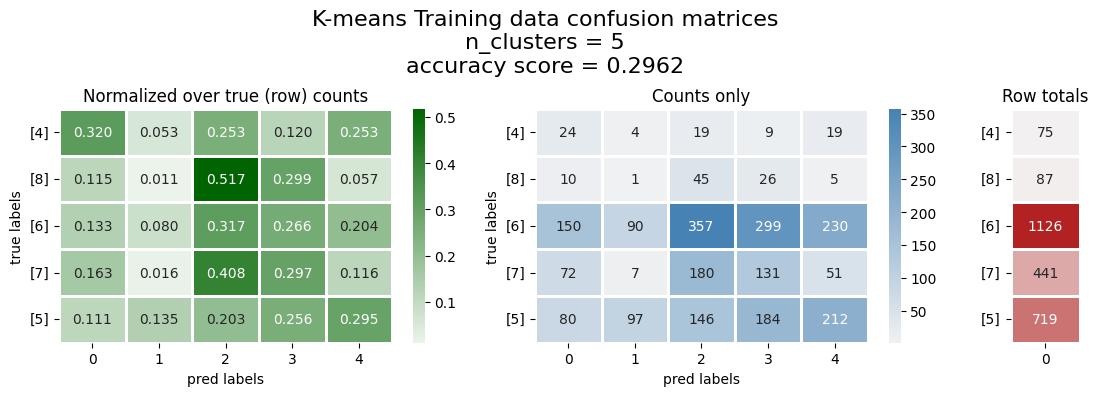

Algorithm: lloyd
Init: k-means++
model: KMeans(n_clusters=5, random_state=0)
score: 0.29616013071895425
map true label to pred label: {4: 0, 5: 4, 6: 2, 7: 3, 8: 1}

K_means_Validating_data_confusion_matrices_n_clusters___5_accuracy_score___0_2944


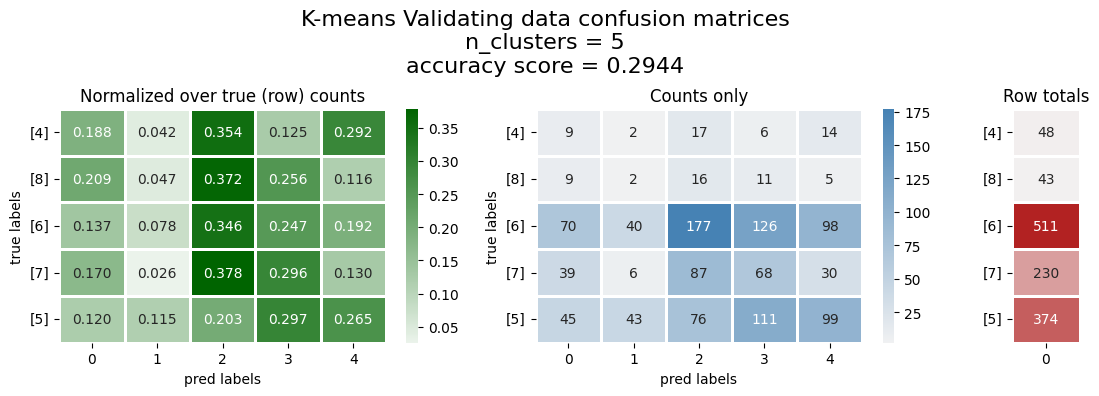

model: KMeans(n_clusters=5, random_state=0)
score: 0.2943615257048093

K_means_Testing_data_confusion_matrices_n_clusters___5_accuracy_score___0_3052


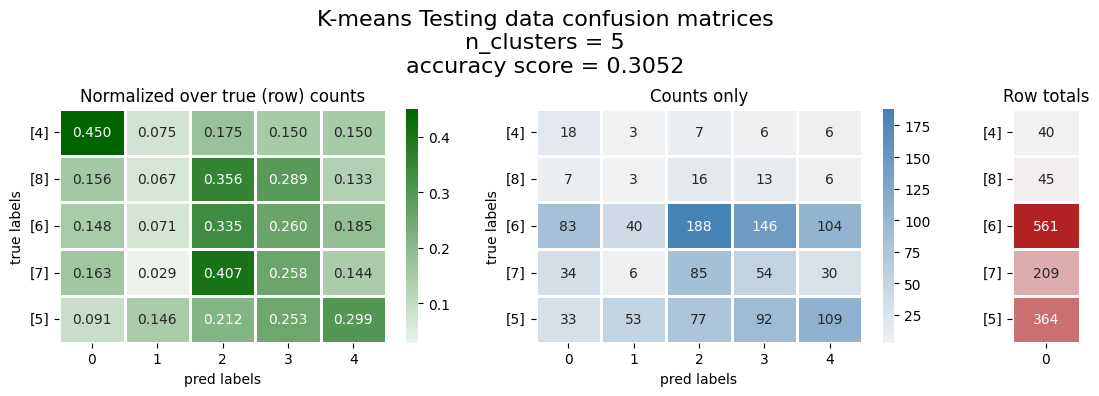

model: KMeans(n_clusters=5, random_state=0)
score: 0.3051681706316653



In [424]:
plot_best_model(kmeans_df, y_train, 'K-means Training data confusion matrices')
plot_best_model(validate_kmeans_df, y_validate, 'K-means Validating data confusion matrices')
plot_best_model(test_kmeans_df, y_test, 'K-means Testing data confusion matrices')

<h4>K-means clustering</h4>
<h4>n_clusters = 3</h4>

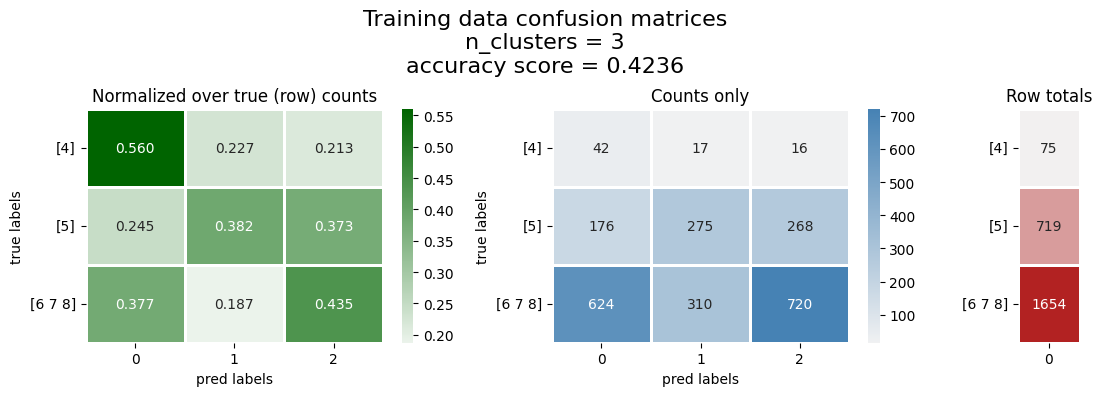

Algorithm: lloyd
Init: k-means++
model: KMeans(n_clusters=3, random_state=0)
score: 0.4236111111111111
map true label to pred label: {4: 0, 5: 1, 6: 2, 7: 2, 8: 2}



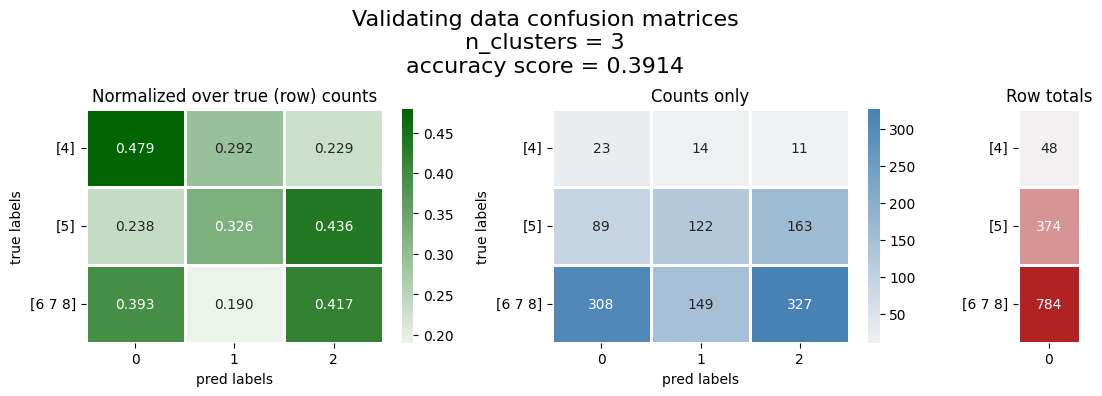

model: KMeans(n_clusters=3, random_state=0)
score: 0.3913764510779436



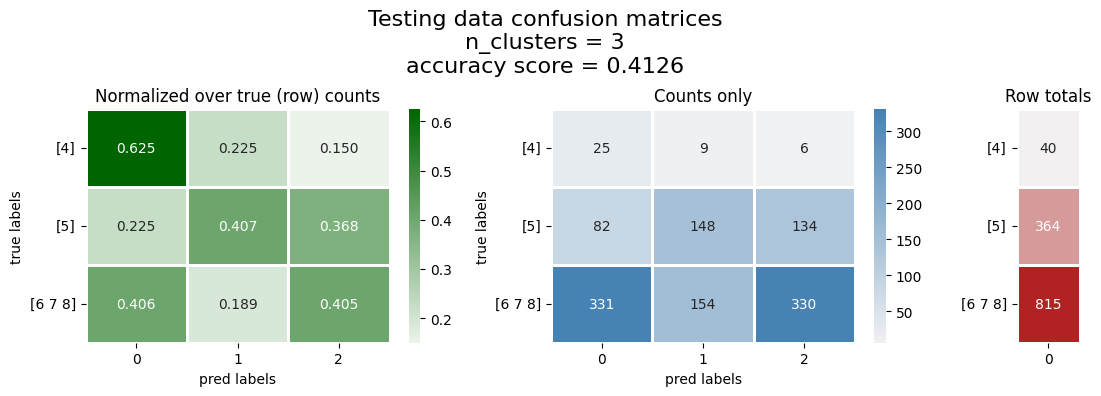

model: KMeans(n_clusters=3, random_state=0)
score: 0.41263330598851516



In [383]:
plot_best_model(kmeans_df_n3, y_train, 'Training data confusion matrices')
plot_best_model(validate_kmeans_df_n3, y_validate, 'Validating data confusion matrices')
plot_best_model(test_kmeans_df_n3, y_test, 'Testing data confusion matrices')

<h4>K-means clustering</h4>
<h4>n_clusters = 2</h4>

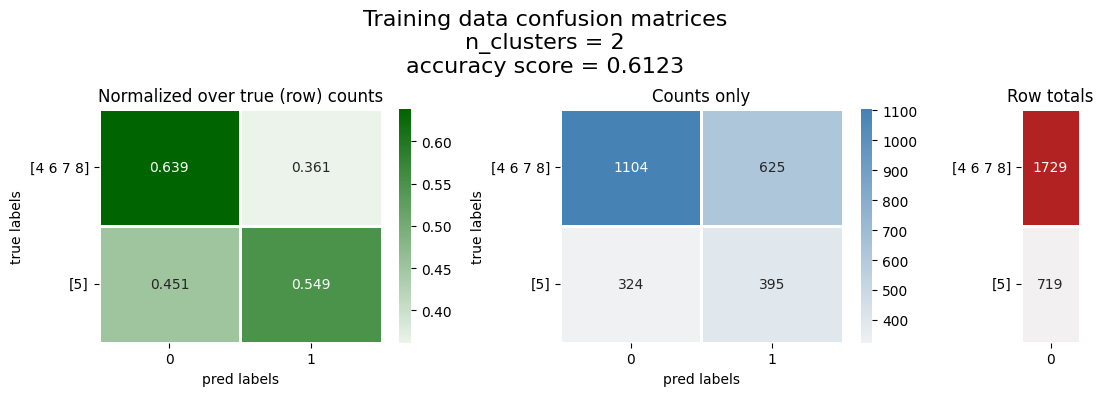

Algorithm: lloyd
Init: k-means++
model: KMeans(n_clusters=2, random_state=0)
score: 0.6123366013071896
map true label to pred label: {4: 0, 5: 1, 6: 0, 7: 0, 8: 0}



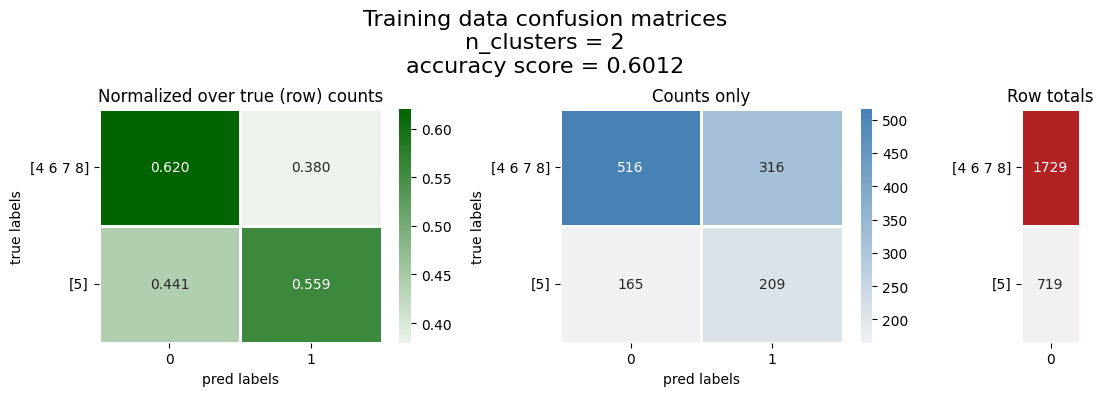

model: KMeans(n_clusters=2, random_state=0)
score: 0.6011608623548922



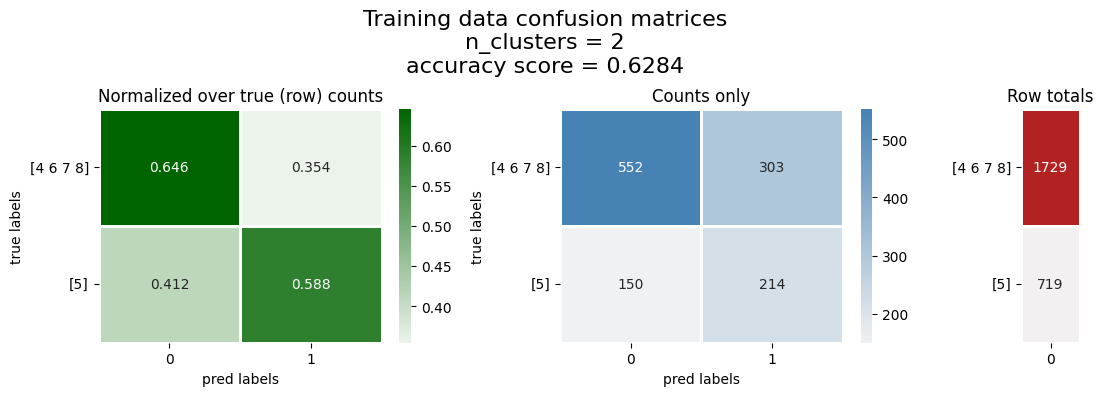

model: KMeans(n_clusters=2, random_state=0)
score: 0.6283839212469237



In [384]:
plot_best_model(kmeans_df_n2, y_train, 'Training data confusion matrices')
plot_best_model(validate_kmeans_df_n2, y_train, 'Training data confusion matrices')
plot_best_model(test_kmeans_df_n2, y_train, 'Training data confusion matrices')

<hr><h4>Agglomerative Clustering</h4>
<p>The confusion matricies and accuracy scores for best performing Agglomerative Clustering models are displayed below. Below is a print out of the confusion matrix and and score for n_clusters=7 models</p>

<h4>n_clusters = 5, 3, 2</h4>

AggloCluster_data_confusion_matrices_n_clusters___5_accuracy_score___0_3873


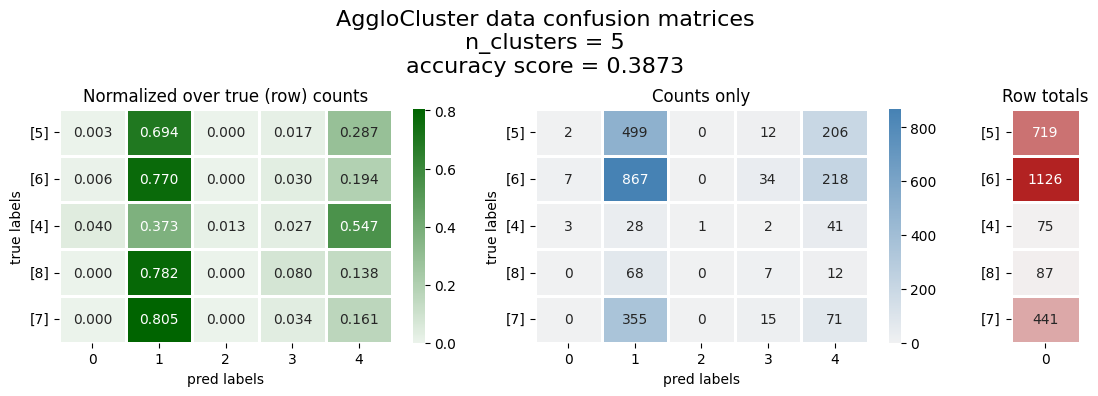

Algorithm: complete
Init: cosine
model: AgglomerativeClustering(linkage='complete', metric='cosine', n_clusters=5)
score: 0.3872549019607843
map true label to pred label: {4: 2, 5: 0, 6: 1, 7: 4, 8: 3}



In [429]:
plot_best_model(final_results_agglo, y_train, 'AggloCluster data confusion matrices')
#plot_best_model(final_results_agglo_n3, y_validate, 'AggloCluster Validating data confusion matrices')
#plot_best_model(final_results_agglo_n2, y_train, 'AggloCluster Training data confusion matrices')

<hr><h4>Non-zero Matrix factorization (NMF)</h4>
<p>The confusion matricies and accuracy scores for best performing NMF models are displayed below. Below is a print out of the confusion matrix and and score for n_clusters=7 models, broken down by training, validating, and testing data sets</p>
<h4>NMF</h4>
<h4>n_clusters = 5</h4>

NMF_Testing_data_predictions___confusion_matrices_n_components___5_accuracy_score___0_3962


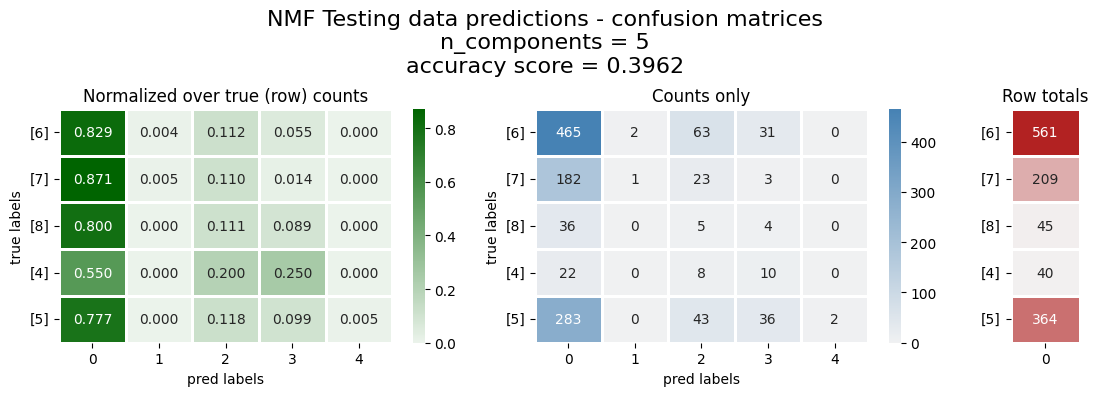

model params: {'alpha_H': 0.1, 'alpha_W': 0.1, 'beta_loss': 'frobenius', 'l1_ratio': 0.25, 'solver': 'mu'}
model: NMF(alpha_H=0.1, alpha_W=0.1, init='nndsvda', l1_ratio=0.25, n_components=5,
    random_state=1, solver='mu')
score: 0.39622641509433965
map true label to pred label: {4: 3, 5: 4, 6: 0, 7: 1, 8: 2}



In [427]:
#plot_best_model(train_final_results_nmf, y_train, 'NMF Training data predictions confusion matrices')
#plot_best_model(validate_final_results_nmf, y_validate, 'NMF Validating data predictions - confusion matrices')
plot_best_model(test_final_results_nmf, y_test, 'NMF Testing data predictions - confusion matrices')

<h4>NMF</h4>
<h4>n_clusters = 3</h4>

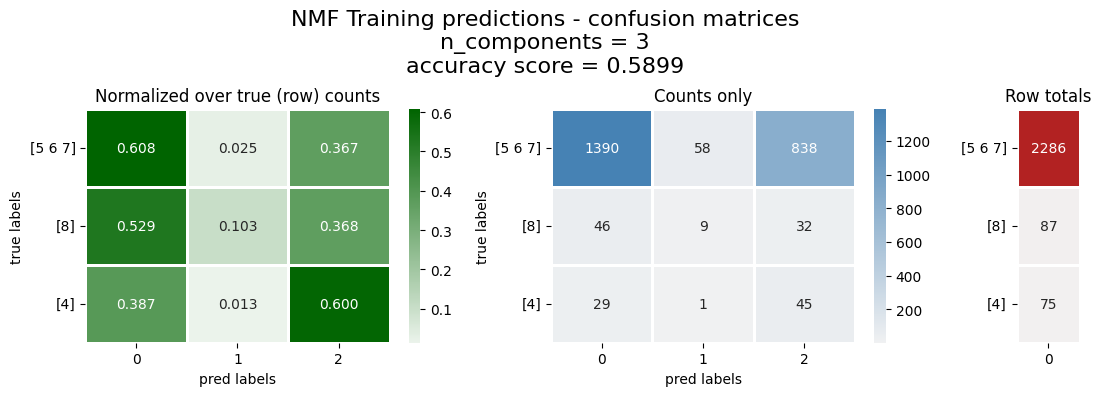

model params: {'alpha_H': 0.1, 'alpha_W': 0.0001, 'beta_loss': 'kullback-leibler', 'l1_ratio': 1, 'solver': 'mu'}
model: NMF(alpha_H=0.1, alpha_W=0.0001, beta_loss='kullback-leibler', init='nndsvda',
    l1_ratio=1, n_components=3, random_state=1, solver='mu')
score: 0.5898692810457516
map true label to pred label: {4: 2, 5: 0, 6: 0, 7: 0, 8: 1}



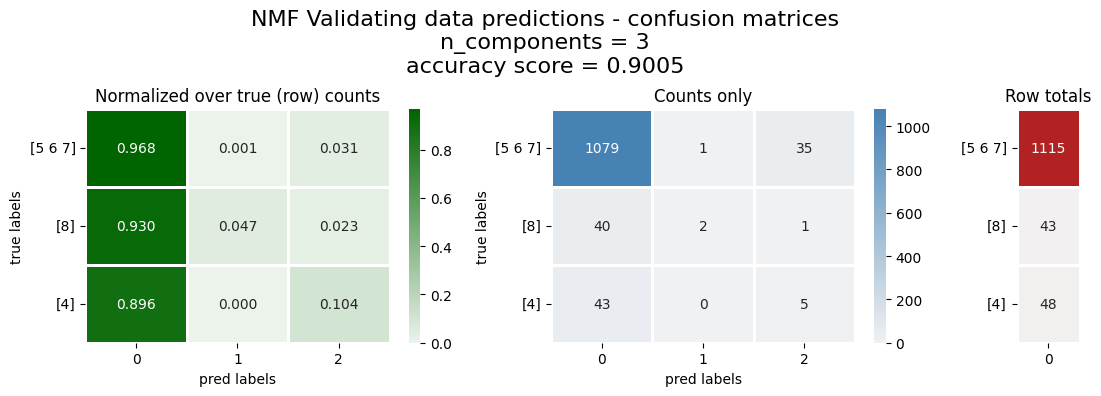

model params: {'alpha_H': 0.1, 'alpha_W': 0.1, 'beta_loss': 'frobenius', 'l1_ratio': 0.125, 'solver': 'mu'}
model: NMF(alpha_H=0.1, alpha_W=0.1, init='nndsvda', l1_ratio=0.125, n_components=3,
    random_state=1, solver='mu')
score: 0.900497512437811
map true label to pred label: {4: 2, 5: 0, 6: 0, 7: 0, 8: 1}



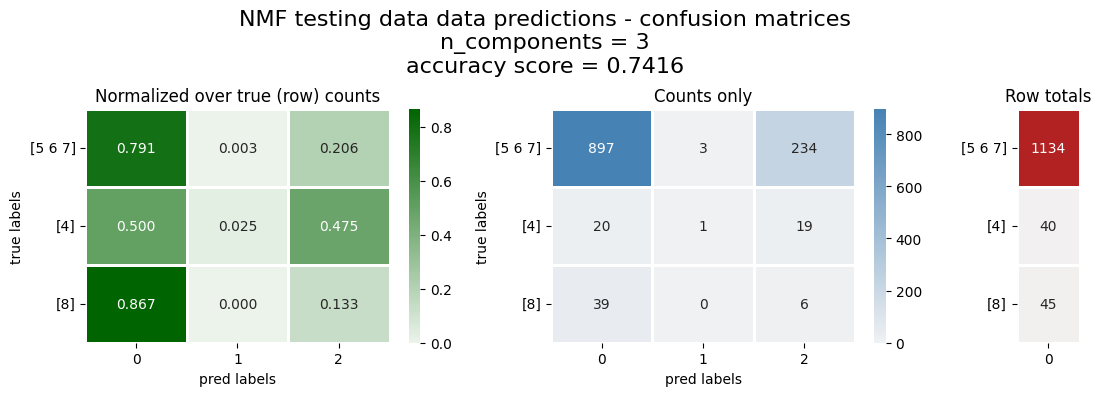

model params: {'alpha_H': 0.1, 'alpha_W': 0.0001, 'beta_loss': 'kullback-leibler', 'l1_ratio': 0.5, 'solver': 'mu'}
model: NMF(alpha_H=0.1, alpha_W=0.0001, beta_loss='kullback-leibler', init='nndsvda',
    l1_ratio=0.5, n_components=3, random_state=1, solver='mu')
score: 0.7415914684167351
map true label to pred label: {4: 1, 5: 0, 6: 0, 7: 0, 8: 2}



In [401]:
plot_best_model(train_final_results_nmf_n3, y_train, 'NMF Training predictions - confusion matrices')
plot_best_model(validate_final_results_nmf_n3, y_validate, 'NMF Validating data predictions - confusion matrices')
plot_best_model(test_final_results_nmf_n3, y_test, 'NMF testing data data predictions - confusion matrices')

<h4>NMF</h4>
<h4>n_clusters = 2</h4>

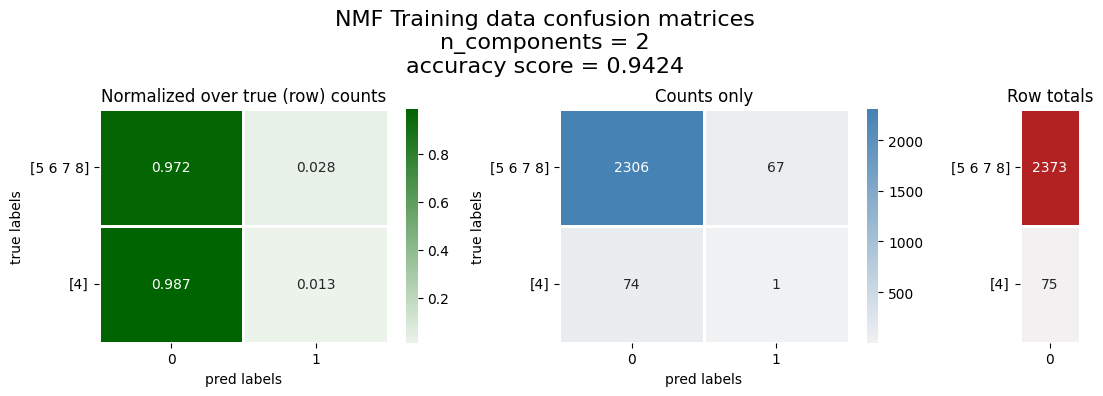

model params: {'alpha_H': 0.1, 'alpha_W': 1e-05, 'beta_loss': 'kullback-leibler', 'l1_ratio': 0.875, 'solver': 'mu'}
model: NMF(alpha_H=0.1, alpha_W=1e-05, beta_loss='kullback-leibler', init='nndsvda',
    l1_ratio=0.875, n_components=2, random_state=1, solver='mu')
score: 0.9424019607843137
map true label to pred label: {4: 1, 5: 0, 6: 0, 7: 0, 8: 0}



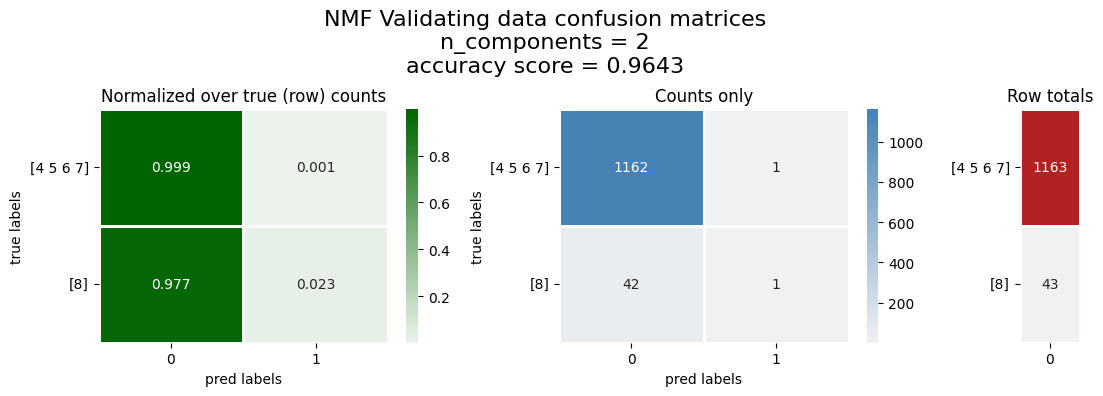

model params: {'alpha_H': 0.1, 'alpha_W': 0, 'beta_loss': 'frobenius', 'l1_ratio': 0.25, 'solver': 'cd'}
model: NMF(alpha_H=0.1, alpha_W=0, init='nndsvda', l1_ratio=0.25, n_components=2,
    random_state=1)
score: 0.9643449419568823
map true label to pred label: {4: 0, 5: 0, 6: 0, 7: 0, 8: 1}



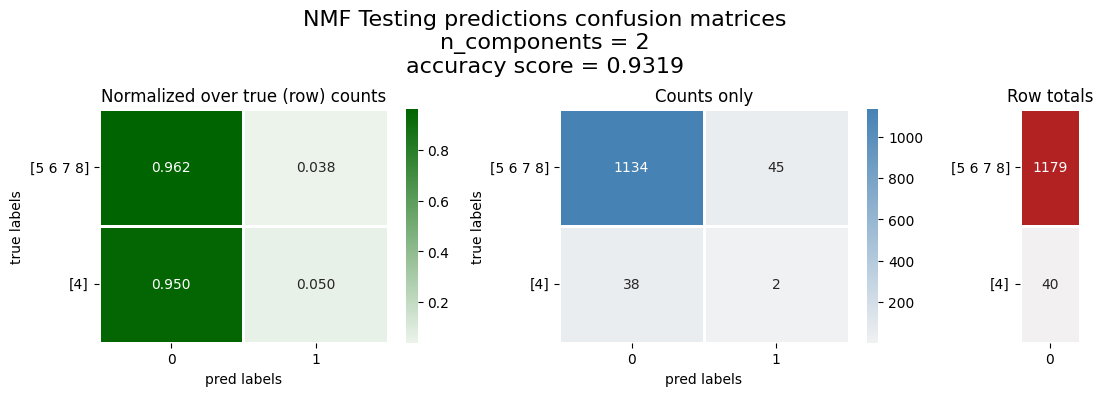

model params: {'alpha_H': 0.1, 'alpha_W': 1e-05, 'beta_loss': 'kullback-leibler', 'l1_ratio': 0.875, 'solver': 'mu'}
model: NMF(alpha_H=0.1, alpha_W=1e-05, beta_loss='kullback-leibler', init='nndsvda',
    l1_ratio=0.875, n_components=2, random_state=1, solver='mu')
score: 0.9319114027891715
map true label to pred label: {4: 1, 5: 0, 6: 0, 7: 0, 8: 0}



In [402]:
plot_best_model(train_final_results_nmf_n2, y_train,  'NMF Training data confusion matrices')
plot_best_model(validate_final_results_nmf_n2, y_validate,  'NMF Validating data confusion matrices')
plot_best_model(test_final_results_nmf_n2, y_test,  'NMF Testing predictions confusion matrices')

<h3>Conclusions</h3>

<p>Based on this project, when using the K-means algorithm, it is possible to generate unsupervised learning models that <i>do</i> find sample clusters that group samples by their 'quality' values. These groupings are significant because the models generated here are not 'trained' to associate a given samples collective features to a specific value, they are only finding groupings based on each samples internal characteristics. This hints that there could be non-random statistical correlations between a wine's chemical properties and a wine sample's subjective quality. However, the fact that only one method of unsupervised learning, based on the k-means clustering methods, indicates that </p>